# Warehouse Optimization

## Initilization

In [39]:
import pandas as pd
import pandas_profiling
import numpy as np
data = pd.read_csv('ML_datafile.csv')
data.reset_index(drop=True, inplace=True)
data = data.drop(['Item No', 'Manufacturer No', 'Product Name', 'Date', 'STOCK TYPE', 'In Stock', 'List No',
                 'UPC Code', 'SaleRate'], axis=1)
data.dtypes
data.head(10)

,Manufacturer,Category,Category Path 1,Category Path 2,Category Path 3,Price(USD),Cost price,Inventory,Shipping,Profit,weight(lb),SaleRateNew
0,Supermicro,Accessory,Hardware & Software,Server & Workstation,Accessory,2.05,1.0000,57,0.0,1.0500,0.90,1.000000
1,APC,Surge Protection,Component,Power Protection / UPS,Surge Protection,11.07,8.3025,51,2.5,0.2675,1.33,1.457143
2,Vantec,120mm,Component,Fan & Heatsink,Case Fan,11.02,8.2650,19,2.5,0.2550,0.54,1.000000
3,Scythe,120mm,Component,Fan & Heatsink,Case Fan,11.02,8.2650,19,2.5,0.2550,0.50,1.117647
4,iMicro,Keyboard,Component,Input & Output Device,Keyboard,10.76,8.0700,26,2.5,0.1900,1.20,0.714286
5,be quiet!,120mm,Component,Fan & Heatsink,Case Fan,10.76,8.0700,79,2.5,0.1900,0.34,1.000000
6,Supermicro,Accessory,Component,Motherboard,Accessory,10.76,8.0700,19,2.5,0.1900,1.00,0.055556
7,Thermaltake,LGA 1155,Component,Fan & Heatsink,CPU Fan & Heatsink,10.76,8.0700,51,2.5,0.1900,0.70,1.159091
8,VCOM,DVI Cable,Component,Cable,DVI Cable,10.76,8.0700,42,2.5,0.1900,0.11,1.400000
9,VCOM,USB Cable,Component,Cable,USB Cable,10.76,8.0700,52,2.5,0.1900,0.30,1.238095


## Exploratory Analysis

In [41]:
# get some basic ideas about the data
def summerize_data(df, columns):
    for column in columns:
        print(column)
        if df.dtypes[column] == np.object: # Categorical data
            print(df[column].value_counts())
        else:
            print(df[column].describe())
            
        print('\n')
    
columns = ["Price(USD)", "Inventory", "weight(lb)", "SaleRateNew"]
summerize_data(data, columns)

Price(USD)
count    4200.000000
mean      284.684874
std       610.347111
min         0.210000
25%        28.190000
50%        84.050000
75%       242.412500
max      7021.250000
Name: Price(USD), dtype: float64


Inventory
count    4200.000000
mean       43.329524
std        90.595148
min         1.000000
25%         5.000000
50%        19.000000
75%        51.000000
max      1002.000000
Name: Inventory, dtype: float64


weight(lb)
count    4200.000000
mean        6.472921
std        13.758992
min         0.000000
25%         0.350000
50%         1.545000
75%         5.490000
max       174.000000
Name: weight(lb), dtype: float64


SaleRateNew
count    4200.000000
mean        0.913433
std         1.138135
min         0.000000
25%         0.125000
50%         0.772727
75%         1.181818
max         8.644444
Name: SaleRateNew, dtype: float64




# Missing Data Points Per Feature

In [43]:
data.isnull().sum()

Manufacturer         0
Category             1
Category Path 1      1
Category Path 2      1
Category Path 3    296
Price(USD)           0
Cost price           0
Inventory            0
Shipping             0
Profit               0
weight(lb)           0
SaleRateNew          0
dtype: int64

## Graphs

In [44]:
import matplotlib.pyplot as plt
from scipy.stats import norm
# if using a Jupyter notebook, inlcude:
%matplotlib inline

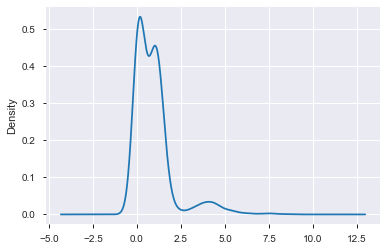

In [46]:
data["SaleRateNew"].plot.kde(bw_method=0.3)

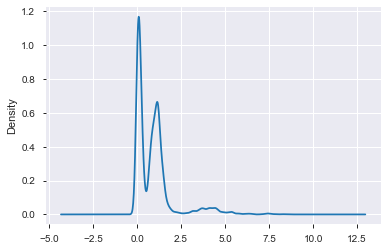

In [47]:
data["SaleRateNew"].plot.kde(bw_method=0.1)

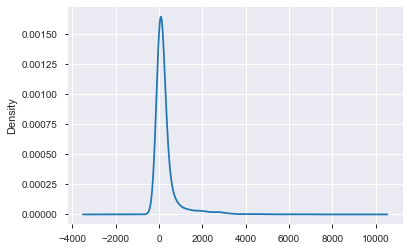

In [48]:
data["Price(USD)"].plot.kde(bw_method=0.3)

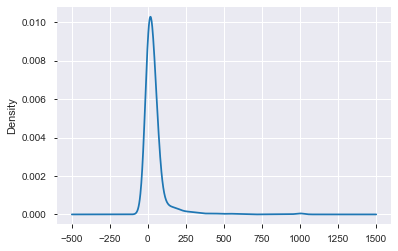

In [49]:
data["Inventory"].plot.kde(bw_method=0.3)

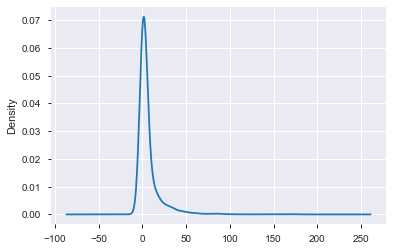

In [50]:
data[ "weight(lb)"].plot.kde(bw_method=0.3)

## corelation matrix

,Price(USD),Cost price,Inventory,Shipping,Profit,weight(lb),SaleRateNew
Price(USD),1.000000,0.999997,-0.107053,0.417039,0.999871,0.523939,-0.117940
Cost price,0.999997,1.000000,-0.107122,0.417225,0.999845,0.524002,-0.117979
Inventory,-0.107053,-0.107122,1.000000,-0.110415,-0.105852,-0.110241,0.812032
Shipping,0.417039,0.417225,-0.110415,1.000000,0.404130,0.791004,-0.145811
Profit,0.999871,0.999845,-0.105852,0.404130,1.000000,0.515159,-0.116367
weight(lb),0.523939,0.524002,-0.110241,0.791004,0.515159,1.000000,-0.141525
SaleRateNew,-0.117940,-0.117979,0.812032,-0.145811,-0.116367,-0.141525,1.000000


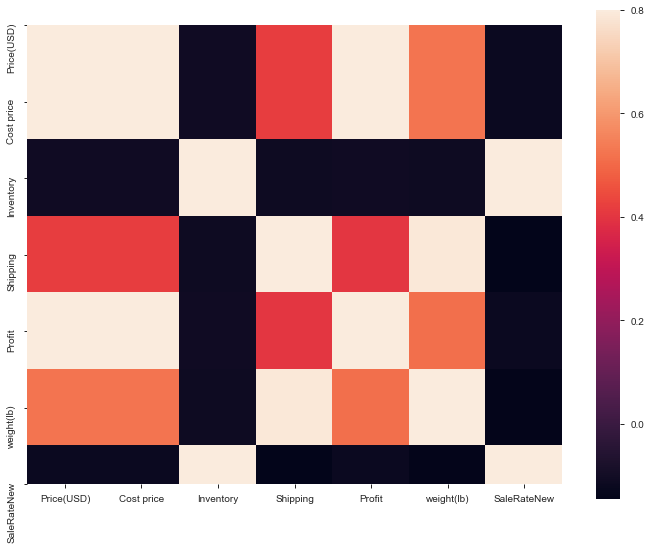

In [51]:
#correlation matrix
import seaborn as sns
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
corrmat

# Relationship with categorical values

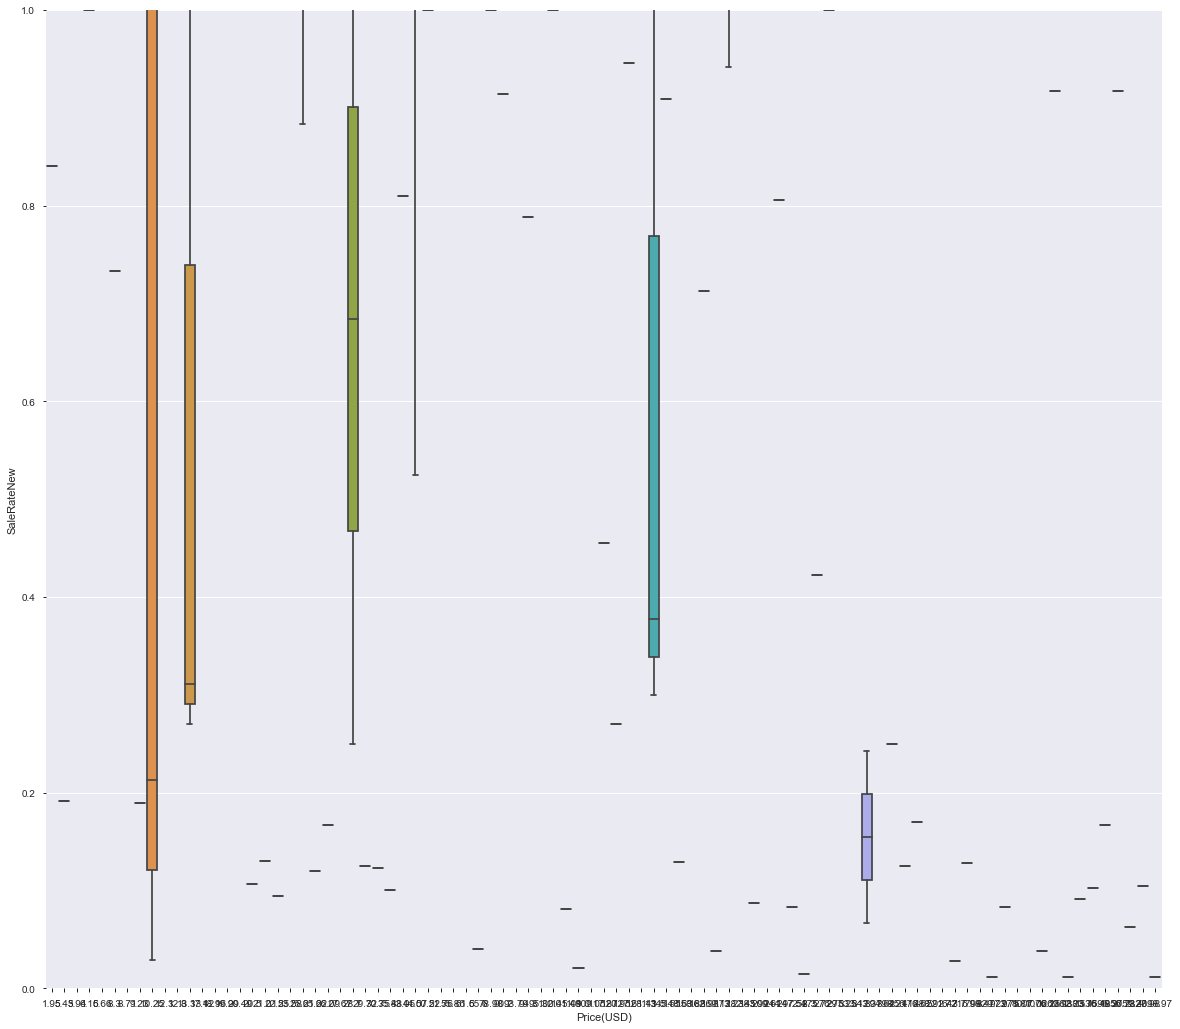

In [53]:
#box plot overallqual/saleprice
box_plot_df = data.sample(n=100, random_state=1)
var = 'Price(USD)'
box_plot_df = pd.concat([box_plot_df['SaleRateNew'], box_plot_df[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 18))
fig = sns.boxplot(x=var, y="SaleRateNew", data=box_plot_df)
fig.axis(ymin=0, ymax=1);

In [54]:
#import pandas_profiling as pp

#check profile report of the dataset

#profile = data.profile_report(title='Pandas Profiling Report')
profile = pandas_profiling.ProfileReport(data)
profile.to_file("EDA.html")

C:\ProgramData\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [55]:
X = data.drop('SaleRateNew', axis=1)
y = data['SaleRateNew']

In [56]:
len(data['Category'].unique())

188

In [57]:
data.head(5)

,Manufacturer,Category,Category Path 1,Category Path 2,Category Path 3,Price(USD),Cost price,Inventory,Shipping,Profit,weight(lb),SaleRateNew
0,Supermicro,Accessory,Hardware & Software,Server & Workstation,Accessory,2.05,1.0000,57,0.0,1.0500,0.90,1.000000
1,APC,Surge Protection,Component,Power Protection / UPS,Surge Protection,11.07,8.3025,51,2.5,0.2675,1.33,1.457143
2,Vantec,120mm,Component,Fan & Heatsink,Case Fan,11.02,8.2650,19,2.5,0.2550,0.54,1.000000
3,Scythe,120mm,Component,Fan & Heatsink,Case Fan,11.02,8.2650,19,2.5,0.2550,0.50,1.117647
4,iMicro,Keyboard,Component,Input & Output Device,Keyboard,10.76,8.0700,26,2.5,0.1900,1.20,0.714286


In [58]:
data.columns

Index(['Manufacturer', 'Category', 'Category Path 1', 'Category Path 2',
       'Category Path 3', 'Price(USD)', 'Cost price', 'Inventory', 'Shipping',
       'Profit', 'weight(lb)', 'SaleRateNew'],
      dtype='object')

In [61]:
# limit to categorical data using df.select_dtypes()
#nominal_data = data.drop(['Price(USD)', 'Cost price', 'Inventory', 'Shipping', 'Profit', 'weight(lb)', 'SaleRateNew'], axis=1)
#ordinal_data = data.drop(nominal_data.columns)
nominal_data = data.select_dtypes(include=[object])
ordinal_data = data.drop(list(nominal_data.columns), axis=1)
nominal_data = nominal_data.replace(np.nan, 'Default', regex=True)
nominal_data.head(30)

,Manufacturer,Category,Category Path 1,Category Path 2,Category Path 3
0,Supermicro,Accessory,Hardware & Software,Server & Workstation,Accessory
1,APC,Surge Protection,Component,Power Protection / UPS,Surge Protection
2,Vantec,120mm,Component,Fan & Heatsink,Case Fan
3,Scythe,120mm,Component,Fan & Heatsink,Case Fan
4,iMicro,Keyboard,Component,Input & Output Device,Keyboard
5,be quiet!,120mm,Component,Fan & Heatsink,Case Fan
6,Supermicro,Accessory,Component,Motherboard,Accessory
7,Thermaltake,LGA 1155,Component,Fan & Heatsink,CPU Fan & Heatsink
8,VCOM,DVI Cable,Component,Cable,DVI Cable
9,VCOM,USB Cable,Component,Cable,USB Cable


## Lable Encoding

In [62]:
from sklearn import preprocessing
nominal_data.reset_index(drop=True, inplace=True)
le = preprocessing.LabelEncoder()
nominal_data_2 = nominal_data.apply(le.fit_transform)
nominal_data_2.head(10)

,Manufacturer,Category,Category Path 1,Category Path 2,Category Path 3
0,98,30,3,33,1
1,2,163,0,27,87
2,110,0,0,15,13
3,91,0,0,15,13
4,118,97,0,18,44
5,117,0,0,15,13
6,98,30,0,22,1
7,103,102,0,15,7
8,108,64,0,5,18
9,108,171,0,5,93


## One-Hot Encoding

In [67]:
# TODO: create a OneHotEncoder object, and fit it to all of X

# 1. INSTANTIATE
enc = preprocessing.OneHotEncoder()
# 2. FIT
enc.fit(nominal_data_2)
# 3. Transform
onehotlabels = enc.transform(nominal_data_2).toarray()
print(onehotlabels.shape)
# as you can see, you've the same number of rows 891
# but now you've so many more columns due to how we changed all the categorical data into numerical data
num_col = (len(nominal_data_2['Manufacturer'].unique())+
              len(nominal_data_2['Category'].unique())+
              len(nominal_data_2['Category Path 1'].unique())+
              len(nominal_data_2['Category Path 2'].unique())+
              len(nominal_data_2['Category Path 3'].unique()))
print(num_col)

(4200, 458)
458


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [18]:
onehotlabels.shape

(4200, 13024)

In [72]:
encoded_data = pd.concat([ordinal_data, pd.DataFrame(onehotlabels)], axis=1)
print(encoded_data.shape)
print(encoded_data.head(5))

(4200, 465)
   Price(USD)  Cost price  Inventory  Shipping  Profit  weight(lb)  \
0        2.05      1.0000         57       0.0  1.0500        0.90   
1       11.07      8.3025         51       2.5  0.2675        1.33   
2       11.02      8.2650         19       2.5  0.2550        0.54   
3       11.02      8.2650         19       2.5  0.2550        0.50   
4       10.76      8.0700         26       2.5  0.1900        1.20   

   SaleRateNew    0    1    2  ...  448  449  450  451  452  453  454  455  \
0     1.000000  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1     1.457143  0.0  0.0  1.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2     1.000000  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3     1.117647  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4     0.714286  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   456  457  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0  
4  0.0  0.0  

[5 rows x 465

## Data Split

In [ ]:
X = encoded_data.drop('SaleRateNew', axis=1)
y = data['SaleRateNew']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# Webscrapping

In [19]:
import sys               # import sys package
old_path = sys.path[:]   # make a copy of the old paths
sys.path.pop(0)          # remove the first one (usually the local)
import bs4               # import the package
sys.path = old_path      # restore the import path

In [20]:
import bs4 as bs
import urllib.request

In [21]:
link = urllib.request.urlopen('https://www.malabs.com/product/MB-SX399EG').read()
soup = bs.BeautifulSoup(link, 'lxml')
print(soup.find_all('li'))

[<li><a href="/product?categoryId=229000000000000">
											Barebone</a>
</li>, <li><a href="/product?categoryId=222000000000000">
											Cable</a>
</li>, <li><a href="/product?categoryId=225000000000000">
											Card Reader</a>
</li>, <li><a href="/product?categoryId=212000000000000">
											Case &amp; Chassis</a>
</li>, <li><a href="/product?categoryId=206000000000000">
											Controller Card</a>
</li>, <li><a href="/product?categoryId=203000000000000">
											CPU &amp; Processor</a>
</li>, <li><a href="/product?categoryId=201000000000000">
											DRAM Memory</a>
</li>, <li><a href="/product?categoryId=226000000000000">
											External Enclosure</a>
</li>, <li><a href="/product?categoryId=216000000000000">
											Fan &amp; Heatsink</a>
</li>, <li><a href="/product?categoryId=204000000000000">
											Hard Drive</a>
</li>, <li><a href="/product?categoryId=215000000000000">
											Input &amp; Output Device</a>
</li>, <li><a href="/product?categ

In [22]:
#for url in soup.find_all('li'):
   # print(url.get('strong'))